# Time Series Prediction with ARIMA 

In [1]:
# Import librairies

In [2]:
import numpy as np
import pandas as pd
#statsmodels est un module Python pour la réalisation de tests statistiques et l’exploration de données statistiques. 
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
#1 - Import dataset

In [4]:
df = pd.read_csv('/home/abc/Documents/monthly-milk-production.csv')

In [5]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [6]:
# 2 - Nettoyage des données - PreProcessing dataset

In [7]:
#Renomer les colonnes
df.columns  = ['Month','Milk production']

In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df.tail()

,Month,Milk production
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [10]:
#to_datetime() méthode Pandas aide à convertir la chaîne Date  (Month) en objet Date Python
df['Month'] = pd.to_datetime(df['Month'])

In [11]:
#Mettre en place "Month" comme index
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Milk production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [13]:
df.describe()

,Milk production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [14]:
# 3 - Data Visualization

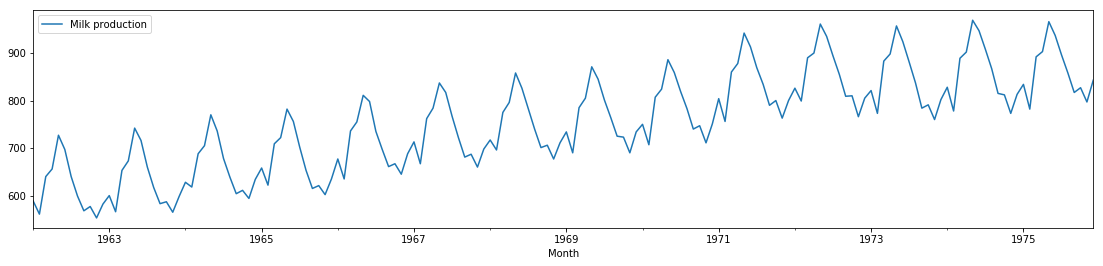

In [15]:
#On observe que la série chronologique présente un modèle de saisonnalité ,Le mois du Mai a toujours un pic 
df.plot(figsize = (19, 4)) 

In [16]:
time_series_predition = df['Milk production']
time_series_predition

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
1962-06-01    697.0
1962-07-01    640.0
1962-08-01    599.0
1962-09-01    568.0
1962-10-01    577.0
1962-11-01    553.0
1962-12-01    582.0
1963-01-01    600.0
1963-02-01    566.0
1963-03-01    653.0
1963-04-01    673.0
1963-05-01    742.0
1963-06-01    716.0
1963-07-01    660.0
1963-08-01    617.0
1963-09-01    583.0
1963-10-01    587.0
1963-11-01    565.0
1963-12-01    598.0
1964-01-01    628.0
1964-02-01    618.0
1964-03-01    688.0
1964-04-01    705.0
1964-05-01    770.0
1964-06-01    736.0
              ...  
1973-07-01    881.0
1973-08-01    837.0
1973-09-01    784.0
1973-10-01    791.0
1973-11-01    760.0
1973-12-01    802.0
1974-01-01    828.0
1974-02-01    778.0
1974-03-01    889.0
1974-04-01    902.0
1974-05-01    969.0
1974-06-01    947.0
1974-07-01    908.0
1974-08-01    867.0
1974-09-01    815.0
1974-10-01    812.0
1974-11-01    773.0
1974-12-01    813.0
1975-01-01    

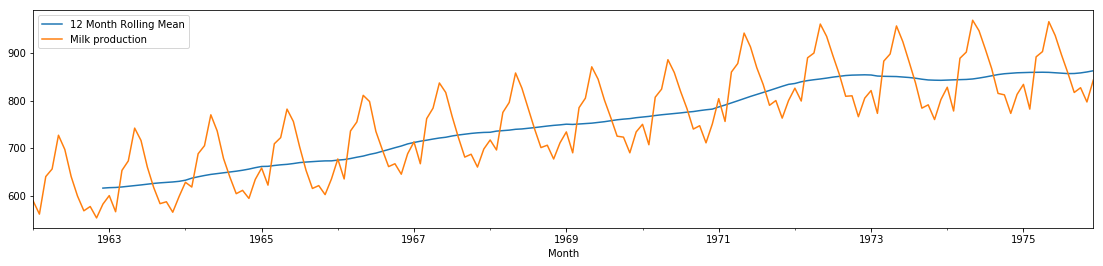

In [17]:
#Calculer la moyenne sur 12 mois
time_series_predition.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series_predition.plot(figsize = (19, 4))
plt.legend()

In [18]:
# 4 -  Train the model Arima

In [19]:
#statsmodels : bibliothèque contenant le modèle SARIMA et d'autres fonctionnalités de statistiques
# ARIMA => AutoRegressive Integrated Moving Average
#Un modèle ARIMA est une classe permettant d'analyser et de prévoir des données de séries chronologiques.

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train_model_arima = sm.tsa.statespace.SARIMAX(df['Milk production'],order=(0,1,0),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [21]:
#Le modèle est préparé sur les données d'apprentissage avec la fonction fit () .
results_model_arima = train_model_arima.fit()

In [22]:
# 5 - Test the model

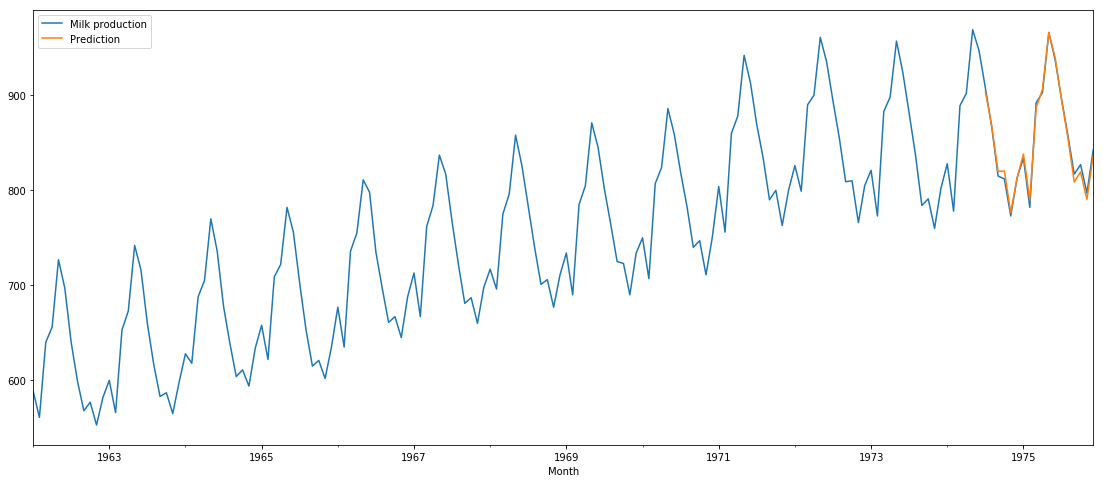

In [23]:
#faire une prediction sur un échantillon de données (du 1974-05 jusqu'à la fin)
df['Prediction'] = results_model_arima.predict(start=150, end=168)
df[['Milk production','Prediction']].plot(figsize=(19,8))

In [24]:
df.tail()

,Milk production,Prediction
Month,,
1975-08-01,858.0,855.358648
1975-09-01,817.0,808.841372
1975-10-01,827.0,819.323185
1975-11-01,797.0,790.427530
1975-12-01,843.0,837.063622


In [25]:
# 6 - Validate the model

In [26]:
#Générer des données de deux ans pour prédire
#DateOffset : Type standard d'incrément de date utilisé pour une plage de dates.
from pandas.tseries.offsets import DateOffset
future_dates_prediction = [df.index[-1] + DateOffset(months=x) for x in range(1,60)]
future_dates_prediction 

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00'),
 Timestamp('1977-12-01 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1978-02-01 00:00:00'),
 Timestamp('1978-03-01 00:00:00'),
 Timestamp('1978-04-01 00:00:00'),
 Timestamp('1978-05-

In [27]:
future_dates_dataframe = pd.DataFrame(index=future_dates_prediction ,columns=df.columns)
future_dates_dataframe

,Milk production,Prediction
1976-01-01,NaN,NaN
1976-02-01,NaN,NaN
1976-03-01,NaN,NaN
1976-04-01,NaN,NaN
1976-05-01,NaN,NaN
1976-06-01,NaN,NaN
1976-07-01,NaN,NaN
1976-08-01,NaN,NaN
1976-09-01,NaN,NaN
1976-10-01,NaN,NaN


In [28]:
final_dataframe = pd.concat([df,future_dates_dataframe])
final_dataframe.tail()

,Milk production,Prediction
1980-07-01,NaN,NaN
1980-08-01,NaN,NaN
1980-09-01,NaN,NaN
1980-10-01,NaN,NaN
1980-11-01,NaN,NaN


In [29]:
final_dataframe

,Milk production,Prediction
1962-01-01,589.0,NaN
1962-02-01,561.0,NaN
1962-03-01,640.0,NaN
1962-04-01,656.0,NaN
1962-05-01,727.0,NaN
1962-06-01,697.0,NaN
1962-07-01,640.0,NaN
1962-08-01,599.0,NaN
1962-09-01,568.0,NaN
1962-10-01,577.0,NaN


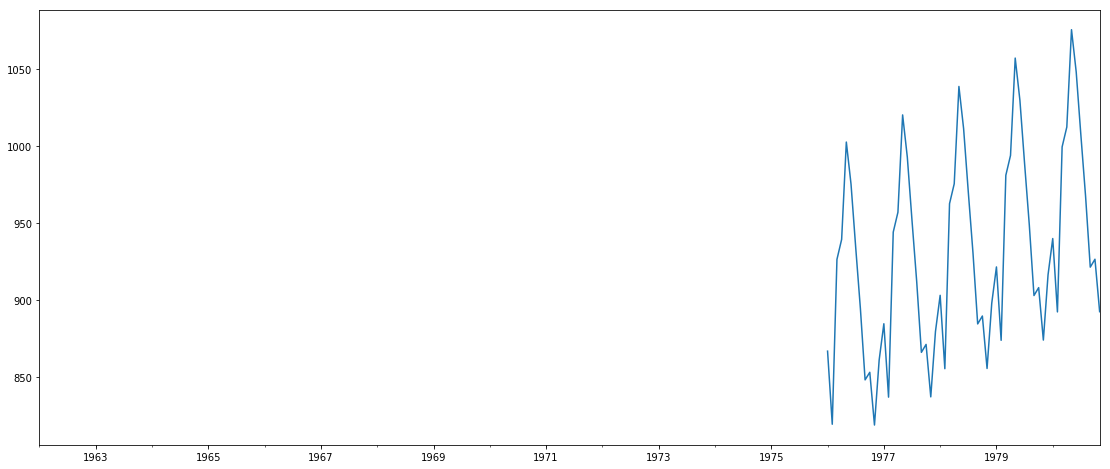

In [30]:
# Prévoir des pas de temps futurs.

final_dataframe['Prediction'] = results_model_arima.predict('1976-01', '1980-11', dynamic=True)
final_dataframe['Prediction'].plot(figsize=(19,8))

In [31]:
# 7 - Visualiser les prédictions

In [32]:
DA = results_model_arima.predict('1976-01', '1980-11')

In [33]:
DA


1976-01-01     866.652151
1976-02-01     819.185605
1976-03-01     926.249915
1976-04-01     939.237123
1976-05-01    1002.474608
1976-06-01     975.160195
1976-07-01     933.962885
1976-08-01     894.280436
1976-09-01     848.005844
1976-10-01     852.923784
1976-11-01     818.668428
1976-12-01     860.920498
1977-01-01     884.453574
1977-02-01     836.783485
1977-03-01     943.979601
1977-04-01     956.877588
1977-05-01    1020.104410
1977-06-01     992.714318
1977-07-01     951.525867
1977-08-01     911.918957
1977-09-01     865.881181
1977-10-01     871.027295
1977-11-01     836.962996
1977-12-01     879.383339
1978-01-01     902.921761
1978-02-01     855.260811
1978-03-01     962.451009
1978-04-01     975.353003
1978-05-01    1038.580303
1978-06-01    1011.193609
1978-07-01     970.004760
1978-08-01     930.394458
1978-09-01     884.346050
1978-10-01     889.481919
1978-11-01     855.409042
1978-12-01     897.821831
1979-01-01     921.360012
1979-02-01     873.698652
1979-03-01  